<a href="https://colab.research.google.com/github/donghuna/AI_Expert_Lecture_Files/blob/main/Lab2_1_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Classification Example #2

In [1]:
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data.dataset import Dataset
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt

# MultiLayer Perceptron (MLP)
* [5, 3]의 노드로 이루어져 있는 2 hidden layer MLP with 5 and 3 nodes each (total 4 layers)
  * 노드 갯수의 변화: 2(입력) -> 5 -> 3 -> 1(출력)
  * 은닉층: 모델의 복잡성, 비선형성 증가
* activation function for hidden layers: tanh


In [2]:
# Mlp
class Mlp(nn.Module):
    def __init__(self):
        super(Mlp, self).__init__()
        self.layer1 = nn.Linear(2, 5)
        self.layer2 = nn.Linear(5, 3)
        self.layer3 = nn.Linear(3, 1)
    def forward(self, x):
        return torch.sigmoid(self.layer3(torch.tanh(self.layer2(torch.tanh(self.layer1(x))))))

In [3]:
class DataGenerator(Dataset):
    def __init__(self, type_, length, std=0.08):
        self.length = length
        if type_ == 'and':
            self.val_l = [0, 0, 0, 1]
        elif type_ == 'or':
            self.val_l = [0, 1, 1, 1]
        elif type_ == 'xor':
            self.val_l = [0, 1, 1, 0]
        else:
            self.val_l = [0, 0, 0, 0]

        self.dataset = []
        for i in range(length):
            x = np.random.normal(i % 2, std)
            y = np.random.normal((i // 2) % 2, std)
            val = self.val_l[i%4]
            self.dataset.append((x, y, val))

    def get_dataset(self):
        return self.dataset

    def __len__(self):
        return self.length

    def __getitem__(self, idx):
        x, y, val = self.dataset[idx]
        return (torch.Tensor([x, y]), torch.Tensor([val]))

In [4]:
DATASET = DataGenerator('xor', 1000)
lr = 0.1 # learning rate
batch_size = 20
num_epochs = 10
num_workers = 4
graph_x = np.linspace(-1.0, 2, 2)

params = {
    'batch_size' : batch_size,
    'shuffle' : True,
    'num_workers' : num_workers
}

dataloader = DataLoader(DATASET, **params)
model = Mlp().cuda()
optimizer = Adam(model.parameters(), lr=lr)

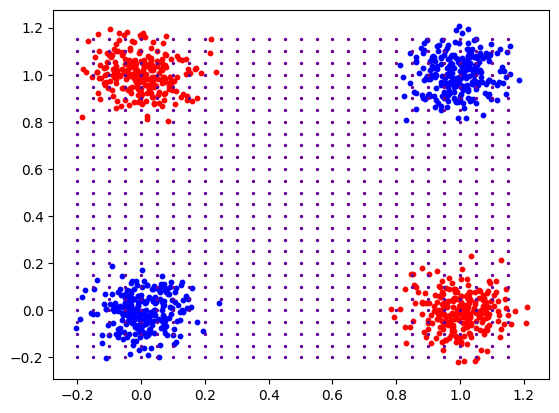

Loss : 0.18414
Loss : 0.17003
Loss : 0.16991
Loss : 0.17006
Loss : 0.16951
Loss : 0.12492
Loss : 0.00601
Loss : 0.00234
Loss : 0.00156
Loss : 0.00116


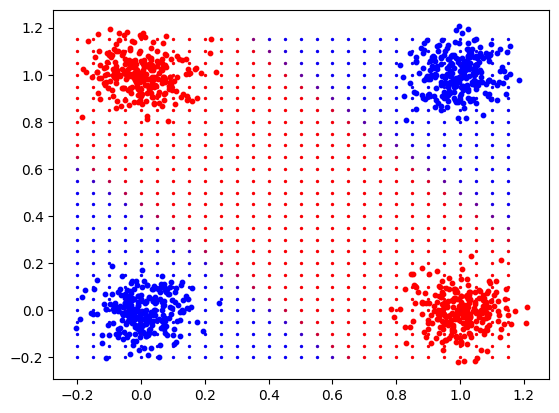

In [5]:
def show(model):
    for item in DATASET.get_dataset():
        x, y, val = item
        if val == 1:
            plt.scatter(x, y, c='red', s=10)
        else:
            plt.scatter(x, y, c='blue', s=10)
    for x in np.arange(-0.2, 1.2, 0.05):
        for y in np.arange(-0.2, 1.2, 0.05):
            val = model(torch.Tensor([x, y]).cuda())
            val = val.data.tolist()[0]
            plt.scatter(x, y, c=[[val, 0, 1-val]], s=2)
    plt.show()

show(model)

for epoch in range(num_epochs):
    total_loss = 0
    for x, val in dataloader:
        x = x.cuda()
        val = val.cuda()
        optimizer.zero_grad()
        val_ =  model(x)
        loss = torch.sum(torch.pow(val - val_, 2))

        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print("Loss : {:.5f}".format(total_loss / len(DATASET)))

    if epoch % 10  == 9:
        show(model)